# Quantum corrections to the Hall effect at low field

In [28]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#%matplotlib widget

In [29]:
hbar = 1.054571817e-34 # Js
me = 9.1093837015e-31 # kg
q = 1.602176634e-19 # C
kB = 1.380649e-23 # J/K

muB = q*hbar/(2*me)

## Simple correction to the conductivity

First we apply a simple small correction which changes $\sigma_{xx}$ but not $\sigma_{xy}$, so that we can see the scale and form of the change to $\rho_{xx}$ and $\rho_{xy}$.

For a small correction, and fields smaller than $1/\mu$, the correction is quadratic in $B$. A small reduction in $\sigma_{xx}$ causes 


In [30]:
# typical values for SiGe:
mstar = 0.3*me   #electron effective mass
mu = 2000 # cm^2/Vs
ns = 6e11 # cm^-2

#typical values for GaAs 2DEG
#mstar = 0.067*me 

mum = mu*1e-4
nsm = ns*1e4

geff = 4.0
tau = mstar*mum/q

sigma0 = nsm*q*mum
ds = -sigma0/5

In [31]:
Bmax = 7.00 # T
Bstep = 0.02 # T
Bmin = 0.00 # T
Bres = 1/Bstep # B points per T

Bvals = np.linspace(Bmin,Bmax,1+int((Bmax-Bmin)*Bres),endpoint=True)

At B = 0.0 T, rhoxx = 6502 Ohm/sq. instead of 1/sigma0 = 5201 Ohm/sq.,
        due to the correction of ds = -0.000038 Ohm-1 to sigma0 = 0.00019226119608 Ohm-1


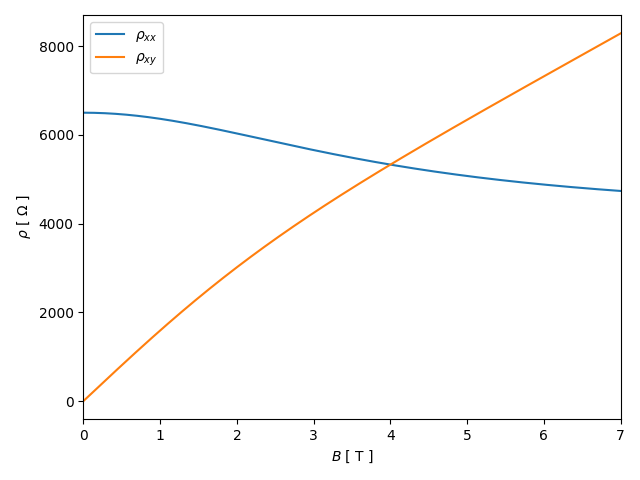

In [32]:
sigmaxx = (sigma0+ds)/(1+(mum*Bvals)**2)
sigmaxy = sigma0*mum*Bvals/(1+(mum*Bvals)**2)

rhoM = 1/(sigmaxx**2 + sigmaxy**2)

rhoxx = sigmaxx*rhoM
rhoxy = sigmaxy*rhoM

print("At B = {} T, rhoxx = {:.0f} Ohm/sq. instead of 1/sigma0 = {:.0f} Ohm/sq.,\n \
       due to the correction of ds = {:0f} Ohm-1 to sigma0 = {} Ohm-1".format(Bvals[0],rhoxx[0],1/sigma0,ds,sigma0))

plt.figure('Hall effect with quantum correction to conductivity', layout='tight')
plt.xlabel('$B$ [ T ]')
plt.xlim(Bmin,Bmax)
plt.ylabel('$\\rho$ [ $\\Omega$ ]')
plt.plot(Bvals,rhoxx, label='$\\rho_{xx}$')
plt.plot(Bvals,rhoxy, label='$\\rho_{xy}$')
plt.legend()
plt.show()


Note that in the case of a positive correction to the conductivity, we obtain positive magnetoresistance. This however should not be mistaken for parallel conduction because the slope of $\rho_{xy}$ increases in this case, whereas for parallel conduction it decreases.

Note also that to see something on a scale of a few tesla, the mobility needs to be fairly low by the standards of Ge QWs.

Classical Boltzmann/Drude: $$\sigma_0 = n_se\mu $$
plus quantum correction: $$ \sigma = \sigma_0 + \delta\sigma_{WL} +\delta\sigma_{EEI} $$
for $\delta_{xy}$, it's $2\,\delta\sigma_{WL}$

the $\delta\sigma_{EEI}$ is from electron-electron interaction correction
and the $\delta\sigma_{WL} < 0 $ is from weak localisation

## Weak localisation

Weak localisation causes an increase in the zero-field resistivity at low temperature, which quickly decreases as field is applied. It is seen in QWs which feature fast large-angle scattering, so should not be seen in good Ge QWs.

The correction to $\sigma_{xx}$ is:
$$\Delta \sigma_1 (B) = \alpha \frac{e^2}{\pi h} \left[ \Psi\left(\frac{1}{2} + \frac{\tau_B}{2\tau_\phi}\right) - \Psi\left(\frac{1}{2} + \frac{\tau_B}{2\tau}\right) \right]$$
$(HLN \qquad Hikami-Larkin-Nagaoka formula)$

with $$\tau_B = \frac{\hbar}{2 e D B}$$ and $$D = \frac{1}{2}v_F^2 \tau$$
which at zero field reduces to
$$\Delta \sigma_1 (0) = -\alpha \frac{e^2}{\pi h}\ln\left(\frac{\tau_\phi}{\tau}\right)$$

$\alpha$ is not the Dingle ratio but a dimensionless constant somewhere between 0.5 and 1.0 in SiGe. Apparently the correction to $\sigma_{xy}$ appears a factor of two larger.

In [33]:
from scipy.special import digamma

Bmax = 10.00 # T
Bstep = 0.001 # T
Bmin = 0.00 # T
Bres = 1/Bstep # B points per T
Bvals = np.linspace(Bmin,Bmax,num = 1+int((Bmax-Bmin)*Bres),endpoint=True)
sigma = np.zeros((len(Bvals),2))
rho = np.zeros((len(Bvals),2))
#print(Bvals)

The digamma function $\Psi\left(\frac{1}{2}+x\right)$ looks like this for real values of $x$.
digamma function is the derivation of the log-Gamma function, $$\psi(x) \equiv \frac{d}{dx}\ln \Gamma(x)
           = \frac{\Gamma'(x)}{\Gamma(x)} $$

the integration expression is: $$\psi(x) = \int_0^{\infty} \left(
\frac{e^{-t}}{t} \frac{e^{-x t}}{1-e^{-t}} \right) \, dt \qquad (x>0)
$$

the gamma function is $$
\Gamma(x) \equiv \int_0^{\infty} t^{x-1}e^{-t}\, dt $$
$$\Gamma(n) = \left( n-1 \right)! \qquad (n \in \mathbb{N}^+) $$

Besides:           
$$ 0.5+ xvals = \frac{1}{2} + \frac{B_{\phi}}{B}$$

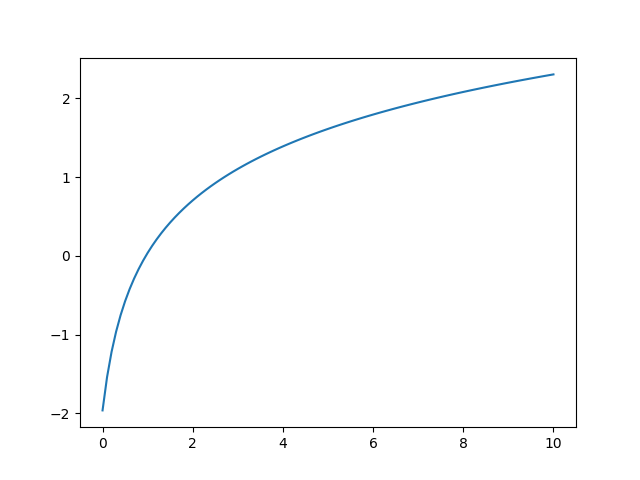

In [34]:
xvals = np.linspace(0,10,101,endpoint=True)
#print(xvals)
plt.figure('Digamma function')
plt.plot(xvals,digamma(0.5+xvals))
plt.show()

In [35]:
kF = np.sqrt(2*np.pi*nsm) # m-1
EF = (hbar**2 * kF**2)/(2*mstar)
vF = hbar*kF/mstar

D = 0.5*vF**2*tau

T = 0.35 # K
# B = 0.001 # T

a = 1.0
prefactor = q**2/(2*np.pi**2*hbar)
tauPhi = hbar/(kB*T)

Bindex = 0
for B in Bvals:
    if B==0.0:
        ds1 = -a*prefactor*np.log(tauPhi/tau)
        
    else:
        tauB = hbar/(2*q*D*B)
        ds1 = a*prefactor*(digamma(0.5+0.5+tauB/(2*tauPhi))-digamma(0.5+0.5+tauB/(2*tau)))

    sigmaxx = (sigma0+ds1)/(1+(mum*B)**2)
    sigmaxy = (sigma0+2*ds1)*mum*B/(1+(mum*B)**2)
    sigma[Bindex,:] = sigmaxx, sigmaxy
    rhoM = 1/(sigmaxx**2 + sigmaxy**2)
    rhoxx = sigmaxx*rhoM
    rhoxy = sigmaxy*rhoM
    rho[Bindex,:] = rhoxx, rhoxy
    
    Bindex=Bindex+1

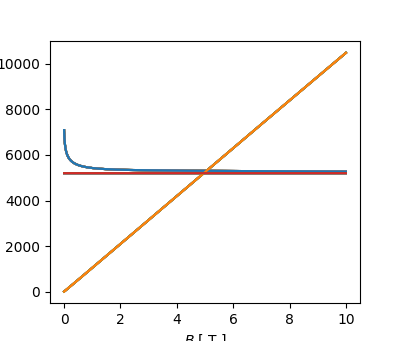

In [46]:
plt.figure('Weak localisation')
plt.xlabel('$B$ [ T ]')
plt.plot(Bvals,rho[:,0], label='$\\rho_{xx}$')
plt.plot(Bvals,rho[:,1], label='$\\rho_{xy}$')
plt.plot(Bvals,1/sigma0*np.ones_like(Bvals) ,label='Bvals')
plt.show()

## Electron-electron interaction

This is usually given as
$$\Delta\sigma_{xx}(T) = \frac{e^2}{\pi h}\left(1-\frac{3}{4}F^*\right)\ln\left(\frac{k_B T}{\hbar/\tau}\right)$$

$F^*$ should only be able to take values up to 0.866, but often needs to be a bit more than 1.0 to fit the data. This correction only applies to $\sigma_{xx}$ not $\sigma_{xy}$. The 1 in the bracket corresponds to the singlet channel and the $-\frac{3}{4}F^*$ corresponds to the triplet channel.

In [19]:
Fstar = 1.1
dsee = prefactor*(1-0.75*Fstar)*np.log(kB*T*tau/hbar)
sigmaxxee = (sigma0+dsee)/(1+(mum*Bvals)**2)
sigmaxyee = (sigma0)*mum*Bvals/(1+(mum*Bvals)**2)
rhoxxee = sigmaxxee/(sigmaxxee**2+sigmaxyee**2)
rhoxyee = sigmaxyee/(sigmaxxee**2+sigmaxyee**2)

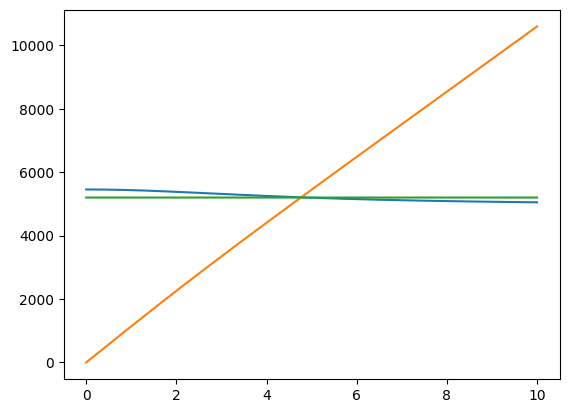

In [20]:
plt.figure('e-e interaction')
plt.plot(Bvals,rhoxxee)
plt.plot(Bvals,rhoxyee)
plt.plot(Bvals,1/sigma0*np.ones_like(Bvals))
plt.show()

## Zeeman term

As magnetic field is applied, the Zeeman effect splits the spin states, giving a correction
$$\Delta\sigma_{xx}(B,T) = \frac{e^2}{\pi h}\left(\frac{F^*}{2}\right) G \left(\frac{g^* \mu_B B}{k_B T}\right)$$
where $\mu_B$ is the Bohr magneton $\frac{e \hbar}{2 m_e}$ and the function $G(b)$ looks like
$$G(b) = \int_0^\infty \mathrm{d}\omega \left[\frac{\mathrm{d}^2}{\mathrm{d}\omega^2} \left(\frac{\omega}{e^\omega -1}\right) \ln \left|1-\frac{b^2}{\omega^2} \right| \right]$$

In [50]:
wvals=np.linspace(0.0001,1000,100001)
#print(wvals)

def Gb(b):
    if b<0.1:
        return 0.091*b**2
    
    elif b>100:
        return 1.0*np.log(b/1.298)
        
    else:
        # Gw = wvals/(np.exp(wvals)-1)*np.log(np.abs(1-(b/wvals)**2))
        # print(Gw)
        # Gd = np.gradient(Gw,wvals)
        # Gd2 = np.gradient(Gd,wvals)
        logw=np.log(1+wvals)
        Gappendix=((2+wvals)*logw-2*wvals)/(wvals**3)*np.log(np.abs(1-(b/logw)**2))
        return np.trapezoid(Gappendix,wvals)

bvals=np.zeros((len(Bvals)))
Gbvals=np.zeros((len(Bvals)))
Bindex=0
for B in Bvals:
    b = geff*muB*B/(kB*T)
    bvals[Bindex]=b
    Gbvals[Bindex]=Gb(b)
    Bindex=Bindex+1

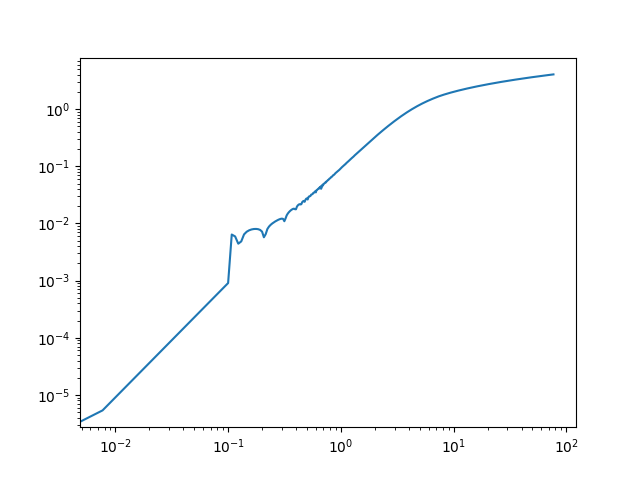

In [51]:
plt.figure('G(b)')
plt.loglog(bvals,Gbvals)
plt.show()